In [38]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import sklearn
from sklearn.metrics import classification_report

In [39]:
df = pd.read_csv('Train.csv')

In [40]:
df

,id,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,1,0,tcp,ftp_data,SF,491,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,2,0,udp,other,SF,146,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,3,0,tcp,private,S0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,4,0,tcp,http,SF,232,8153,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,5,0,tcp,http,SF,199,420,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,125969,0,tcp,private,S0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
125969,125970,8,udp,private,SF,105,145,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,125971,0,tcp,smtp,SF,2231,384,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,125972,0,tcp,klogin,S0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [41]:
df.head()

,id,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,1,0,tcp,ftp_data,SF,491,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,2,0,udp,other,SF,146,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,3,0,tcp,private,S0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,4,0,tcp,http,SF,232,8153,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,5,0,tcp,http,SF,199,420,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           125973 non-null  int64  
 1   duration                     125973 non-null  int64  
 2   protocol_type                125973 non-null  object 
 3   service                      125973 non-null  object 
 4   flag                         125973 non-null  object 
 5   src_bytes                    125973 non-null  int64  
 6   dst_bytes                    125973 non-null  int64  
 7   land                         125973 non-null  int64  
 8   wrong_fragment               125973 non-null  int64  
 9   urgent                       125973 non-null  int64  
 10  hot                          125973 non-null  int64  
 11  num_failed_logins            125973 non-null  int64  
 12  logged_in                    125973 non-null  int64  
 13 

In [43]:
df.isnull().sum()

,0
id,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0


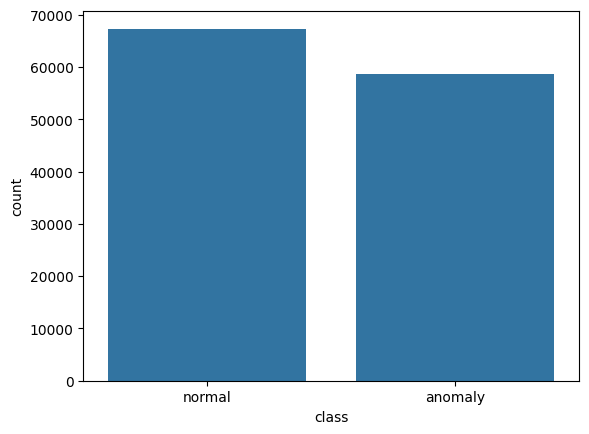

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=df,x="class")
plt.show()

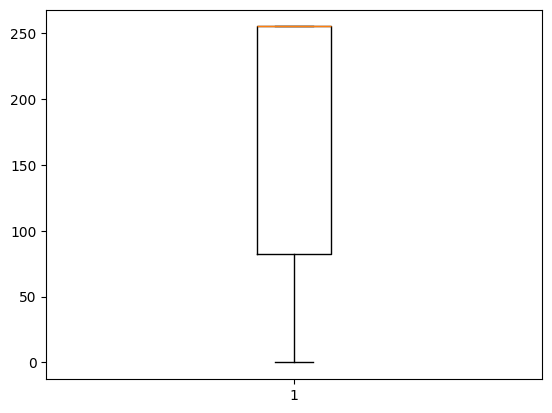

In [45]:
plt.boxplot(data=df,x="dst_host_count")
plt.show()

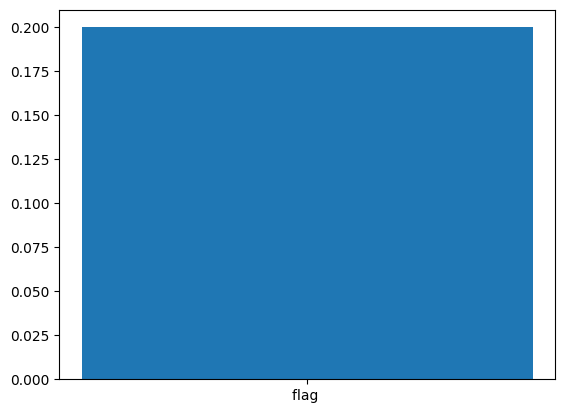

In [46]:
plt.bar(data=df,x="flag ",height=.2)
plt.show()

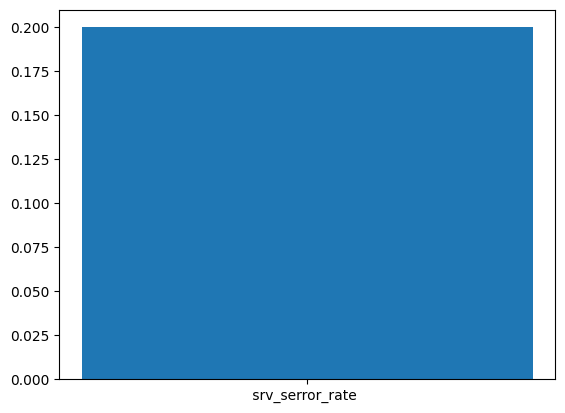

In [47]:
plt.bar(data=df,x=' srv_serror_rate  ',height=.2)
plt.show()

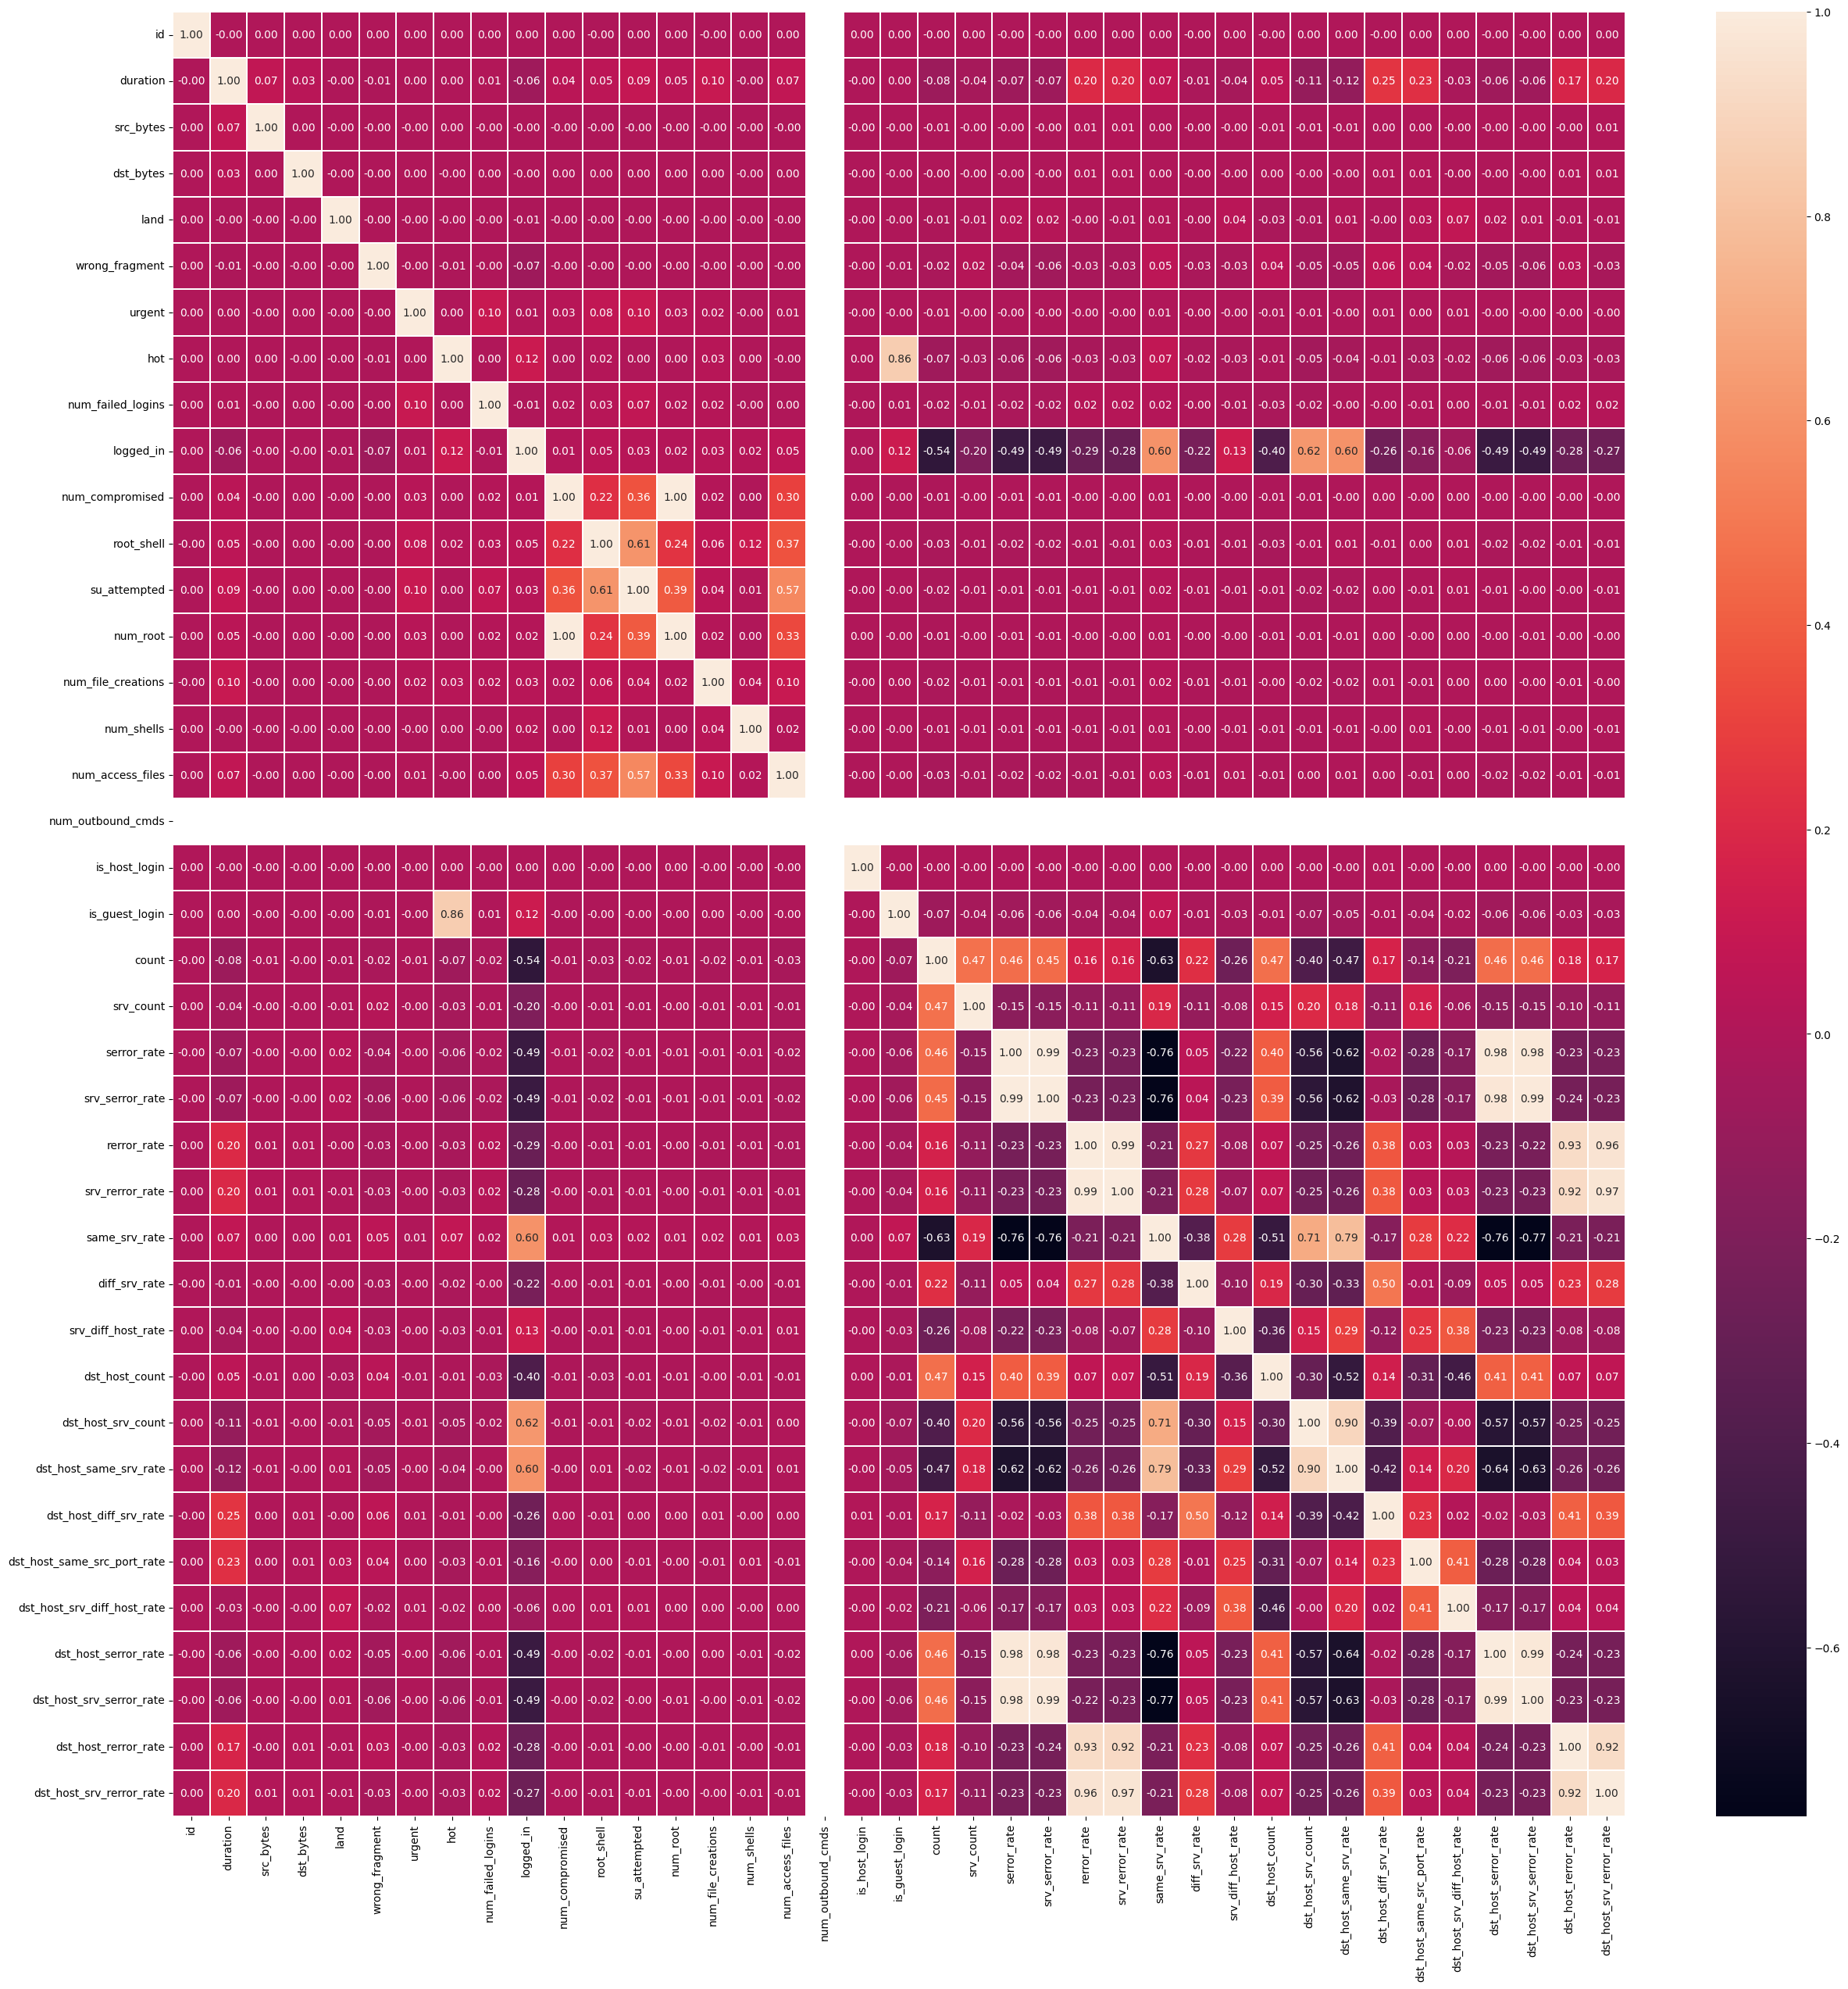

In [48]:
plt.figure(figsize=(30,30))
sns.heatmap(data=df.corr(numeric_only=True),annot=True,linewidths=.3,fmt="1.2f")
plt.show()

In [53]:
x_train = df.drop(columns = ['srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate','class'])
y_train = df["class"]

In [54]:
x_train

,id,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate
0,1,0,tcp,ftp_data,SF,491,0,0,0,0,...,0,0,0,0,0,0,0,2,2,0.0
1,2,0,udp,other,SF,146,0,0,0,0,...,0,0,0,0,0,0,0,13,1,0.0
2,3,0,tcp,private,S0,0,0,0,0,0,...,0,0,0,0,0,0,0,123,6,1.0
3,4,0,tcp,http,SF,232,8153,0,0,0,...,0,0,0,0,0,0,0,5,5,0.2
4,5,0,tcp,http,SF,199,420,0,0,0,...,0,0,0,0,0,0,0,30,32,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,125969,0,tcp,private,S0,0,0,0,0,0,...,0,0,0,0,0,0,0,184,25,1.0
125969,125970,8,udp,private,SF,105,145,0,0,0,...,0,0,0,0,0,0,0,2,2,0.0
125970,125971,0,tcp,smtp,SF,2231,384,0,0,0,...,0,0,0,0,0,0,0,1,1,0.0
125971,125972,0,tcp,klogin,S0,0,0,0,0,0,...,0,0,0,0,0,0,0,144,8,1.0


In [55]:
for column in x.columns:
    if x_train[column].dtype == type(object):
        labelencoder = LabelEncoder()
        x_train[column] = labelencoder.fit_transform(x_train[column])


In [56]:
labelencoder = LabelEncoder()

y_train = labelencoder.fit_transform(y_train)

In [57]:
df2 = pd.read_csv('Test.csv')
x_test = df2.drop(columns = ['class'])
for column in x_test.columns:
    if x_test[column].dtype == type(object):
        labelencoder1 = LabelEncoder()
        x_test[column] = labelencoder1.fit_transform(x_test[column])

In [58]:
y_test = df2['class']
labelencoder = LabelEncoder()

y_test = labelencoder.fit_transform(y_test)

In [59]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=100, random_state=0)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [61]:
score = model.score(x_train,y_train)
print(f'Training Accuracy: {score*100:.2f}%')

Training Accuracy: 99.94%


In [62]:
score = model.score(x_test,y_test)
print(f'Testing Accuracy: {score*100:.2f}%')

Testing Accuracy: 83.86%


In [63]:
print(predictions)

[0 0 1 ... 0 1 0]


In [64]:
"Training Classification Report: ", classification_report(y_train, model.predict(x_train))

('Training Classification Report: ',
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     58630\n           1       1.00      1.00      1.00     67343\n\n    accuracy                           1.00    125973\n   macro avg       1.00      1.00      1.00    125973\nweighted avg       1.00      1.00      1.00    125973\n')

In [65]:
"Testing Classification Report: ", classification_report(y_test, predictions)

('Testing Classification Report: ',
 '              precision    recall  f1-score   support\n\n           0       0.96      0.75      0.84     12833\n           1       0.74      0.96      0.84      9711\n\n    accuracy                           0.84     22544\n   macro avg       0.85      0.85      0.84     22544\nweighted avg       0.87      0.84      0.84     22544\n')

In [67]:
import pickle
filename = 'ddos.sav'
pickle.dump(model, open(filename, 'wb'))
# loading the saved model
loaded_model = pickle.load(open('ddos.sav', 'rb'))